# LAB 05.02 - Model evaluation

In [1]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20201.xai4eng/master/content/init.py
import init; init.init(force_download=False); init.get_weblink()

endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


In [52]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                session_id="UDEA", 
                                                lab_id="L05.02" )
init.get_weblink()

username: kevin.martinez@udea.edu.co
password: ········
endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [9]:
import numpy as np

x = np.random.randint(100, size=(20,5))
print(range(len(x)), x.shape[1])
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

range(0, 20) 5


array([[ 0,  1,  2,  3,  4],
       [ 1, 40, 76, 24, 18],
       [ 2, 11, 58,  7, 13],
       [ 3, 20, 31, 41, 27],
       [ 4, 53, 68, 40, 48],
       [ 5, 89, 37, 36, 52],
       [ 6, 57, 89, 13, 10],
       [ 7, 66, 42, 59, 14],
       [ 8, 68, 93, 67, 47],
       [ 9,  6, 86,  9, 60],
       [10, 64, 54, 75, 47],
       [11, 97, 39, 59, 75],
       [12, 60, 23, 26, 47],
       [13, 34, 96, 91,  5],
       [14, 64, 80, 25, 71],
       [15, 88, 48, 58, 93],
       [16, 74, 74, 49, 29],
       [17, 52,  0, 31, 44],
       [18, 59, 36, 30, 72],
       [19, 63, 63, 89,  5]])

In [10]:
ridxs = np.r_[2,4,5] # get rows
x[ridxs]

array([[ 2, 11, 58,  7, 13],
       [ 4, 53, 68, 40, 48],
       [ 5, 89, 37, 36, 52]])

In [11]:
cidxs = np.r_[1,3] # get columns
x[:,cidxs]

array([[ 1,  3],
       [40, 24],
       [11,  7],
       [20, 41],
       [53, 40],
       [89, 36],
       [57, 13],
       [66, 59],
       [68, 67],
       [ 6,  9],
       [64, 75],
       [97, 59],
       [60, 26],
       [34, 91],
       [64, 25],
       [88, 58],
       [74, 49],
       [52, 31],
       [59, 30],
       [63, 89]])

In [12]:
x[ridxs][:, cidxs]

array([[11,  7],
       [53, 40],
       [89, 36]])

and the dimensions of the array are accessible through `len` and `shape`

In [13]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [14]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 40, 76, 24, 18],
       [ 2, 11, 58,  7, 13]])

In [15]:
x[3:]

array([[ 3, 20, 31, 41, 27],
       [ 4, 53, 68, 40, 48],
       [ 5, 89, 37, 36, 52],
       [ 6, 57, 89, 13, 10],
       [ 7, 66, 42, 59, 14],
       [ 8, 68, 93, 67, 47],
       [ 9,  6, 86,  9, 60],
       [10, 64, 54, 75, 47],
       [11, 97, 39, 59, 75],
       [12, 60, 23, 26, 47],
       [13, 34, 96, 91,  5],
       [14, 64, 80, 25, 71],
       [15, 88, 48, 58, 93],
       [16, 74, 74, 49, 29],
       [17, 52,  0, 31, 44],
       [18, 59, 36, 30, 72],
       [19, 63, 63, 89,  5]])

we can do the same thing with vectors

In [16]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [17]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [18]:
np.random.permutation(v)

array([103, 116, 104, 114, 105, 102, 100, 117, 107, 108, 109, 110, 101,
       118, 106, 111, 119, 113, 112, 115])

or the first natural numbers

In [19]:
p = np.random.permutation(20)
p

array([14,  7,  6,  3, 11,  1, 18,  0,  9, 13,  2, 19,  5,  8, 17,  4, 15,
       16, 12, 10])

In [22]:
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [21]:
p[5:]

array([ 1, 18,  0,  9, 13,  2, 19,  5,  8, 17,  4, 15, 16, 12, 10])

In [25]:
p[:5]

array([14,  7,  6,  3, 11])

In [24]:
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 40, 76, 24, 18],
       [ 2, 11, 58,  7, 13],
       [ 3, 20, 31, 41, 27],
       [ 4, 53, 68, 40, 48],
       [ 5, 89, 37, 36, 52],
       [ 6, 57, 89, 13, 10],
       [ 7, 66, 42, 59, 14],
       [ 8, 68, 93, 67, 47],
       [ 9,  6, 86,  9, 60],
       [10, 64, 54, 75, 47],
       [11, 97, 39, 59, 75],
       [12, 60, 23, 26, 47],
       [13, 34, 96, 91,  5],
       [14, 64, 80, 25, 71],
       [15, 88, 48, 58, 93],
       [16, 74, 74, 49, 29],
       [17, 52,  0, 31, 44],
       [18, 59, 36, 30, 72],
       [19, 63, 63, 89,  5]])

how do you interpret this?

In [20]:
v[p[5:]]

array([101, 118, 100, 109, 113, 102, 119, 105, 108, 117, 104, 115, 116,
       112, 110])

In [23]:
x[p[:5]]

array([[14, 64, 80, 25, 71],
       [ 7, 66, 42, 59, 14],
       [ 6, 57, 89, 13, 10],
       [ 3, 20, 31, 41, 27],
       [11, 97, 39, 59, 75]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct` 
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [26]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [28]:
def split_data(X, y, pct):
    
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    
    n = len(y)
    permutation = np.random.permutation(n)
    n1_elements = int(n * pct)
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]
    X1 = X[[permutation_partition_1]]
    X2 = X[[permutation_partition_2]]
    y1 = y[[permutation_partition_1]]
    y2 = y[[permutation_partition_2]]
    return X1, X2, y1, y2

check your solution manually with the following code

In [27]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 71 11  4 23 49 66 29]
 [ 2  9 26 89 35 61 66 96]
 [ 3  9 88 26 94 45 40  5]
 [ 4 60 34 46 61  0 56 74]
 [ 5 50 86 32 96 30 17 10]
 [ 6 56 87 84 16 67 58 51]
 [ 7 67 44  5 22 37 55 85]
 [ 8 25 90 15 95 92 55 76]
 [ 9 58 67 93  2  7  2 18]
 [10 14 65 78 28 95 57 57]
 [11 18 14 74 21 59 91  8]
 [12  2 73 56 44 48 31 16]
 [13 73 77 18  9 91 50 35]
 [14 14 68 80 64 26 13  8]
 [15 73 35 32 27 99 89 72]
 [16 98 68 28 88 74 59 73]
 [17  7 82 78 86 27 64 53]
 [18 19  5 41 52 87 86 63]
 [19 35 22 31 48 16 17  2]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [30]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

<ipython-input-28-a457624b30fa>:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X1 = X[[permutation_partition_1]]
<ipython-input-28-a457624b30fa>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X2 = X[[permutation_partition_2]]
<ipython-input-28-a457624b30fa>:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y1

In [31]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(6652, 6652, 2190, 2190)

In [32]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[17  7 82 78 86 27 64 53]
 [18 19  5 41 52 87 86 63]
 [ 9 58 67 93  2  7  2 18]
 [ 7 67 44  5 22 37 55 85]
 [14 14 68 80 64 26 13  8]
 [12  2 73 56 44 48 31 16]
 [ 3  9 88 26 94 45 40  5]
 [19 35 22 31 48 16 17  2]
 [15 73 35 32 27 99 89 72]
 [16 98 68 28 88 74 59 73]
 [ 4 60 34 46 61  0 56 74]
 [ 1 71 11  4 23 49 66 29]
 [10 14 65 78 28 95 57 57]
 [ 5 50 86 32 96 30 17 10]] 
--
[[13 73 77 18  9 91 50 35]
 [11 18 14 74 21 59 91  8]
 [ 0  1  2  3  4  5  6  7]
 [ 2  9 26 89 35 61 66 96]
 [ 6 56 87 84 16 67 58 51]
 [ 8 25 90 15 95 92 55 76]] 
--
[117 118 109 107 114 112 103 119 115 116 104 101 110 105] 
--
[113 111 100 102 106 108] 
--


In [33]:
Xts

array([[13, 73, 77, 18,  9, 91, 50, 35],
       [11, 18, 14, 74, 21, 59, 91,  8],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 2,  9, 26, 89, 35, 61, 66, 96],
       [ 6, 56, 87, 84, 16, 67, 58, 51],
       [ 8, 25, 90, 15, 95, 92, 55, 76]])

**submit your code**

In [34]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [37]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [38]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

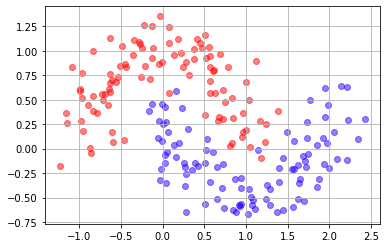

In [39]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.49695, 0.50305)

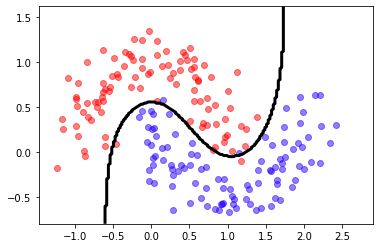

In [40]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [41]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1], dtype=int64)

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [62]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"
    import math
    n = len(y)
    divisor = math.floor(n/2)
    
    X_train = X[:divisor]
    X_test = X[divisor:]
    Y_train = y[:divisor]
    #Y_test = y[divisor:]
    
    estimator.fit(X_train, Y_train)
    
    predictions = estimator.predict(X_test)
    
    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [63]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [65]:
X = np.array([[ 1.64247266,  0.09387231],
 [-0.24671484,  1.06225344],
 [ 0.02669305,  0.16812697],
 [-0.7100346,   0.69460326],
 [-0.49043707,  0.25055735],
 [ 0.6966046,  -0.5500982 ],
 [ 0.40726623,  0.80713523],
 [-0.97866827, 0.47771203],
 [ 0.89906148,  0.25101618],
 [ 0.81453399, -0.57883434],
 [ 0.21304158,  0.3430131 ],
 [ 1.76665008,  0.0218057 ],
 [ 1.09722866, -0.41198785],
 [ 0.71714185,  0.5265123 ],
 [ 0.42744086,  1.11899043],
 [ 1.86038125, -0.09882981],
 [-0.20338198,  0.69308872],
 [ 2.10977889, -0.21475159],
 [ 0.27211183,  0.09299704],
 [-0.17373561,  0.00458162],
 [-0.87279098,  0.70667578],
 [ 1.1274946,  0.10050725],
 [ 1.19791925, -0.41094089],
 [ 0.48684078, -0.4119439 ],
 [ 0.83449989,  0.78319146]])
y = np.array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0])
X.shape, y.shape

((25, 2), (25,))

In [66]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

**submit your code**

In [67]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [68]:
import numpy as np
y = np.random.randint(10, size=15)
print(y)

[3 5 3 9 3 9 1 6 7 6 2 3 9 3 3]


In [69]:
y_less_than_5 = y<5
print(y_less_than_5)

[ True False  True False  True False  True False False False  True  True
 False  True  True]


and how we can select elements of a vector using a boolean vector of the same length

In [70]:
y[y_less_than_5]

array([3, 3, 3, 1, 2, 3, 3, 3])

In [71]:
y[y<5]

array([3, 3, 3, 1, 2, 3, 3, 3])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [72]:
v = np.random.randint(20, size=15)
v

array([ 5,  5, 13, 13, 14, 11, 14, 16, 17,  6,  7,  4, 10, 10, 18])

In [73]:
v[y<5]

array([ 5, 13, 14, 14,  7,  4, 10, 18])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [74]:
def select_per_class(X, y):
    X1 = X[y == 0]
    X2 = X[y == 1]
    return X1, X2

check manually your code

In [75]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [77]:
a,b = select_per_class(X, y)
print(a)
print(b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [78]:
student.submit_task(globals(), task_id="task_03");

## Task 4: Measure accuracy

complete the following function such that:

- it receives two binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [81]:
def accuracy(y_true, y_pred):
    result = np.sum(y_true == y_pred)/len(y_true)
    return result

In [82]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [83]:
student.submit_task(globals(), task_id="task_04");

## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [84]:

def split_fit_predict(estimator, X, y, train_pct):
    
    def split_data(X, y, pct):
        assert len(X)==len(y), "X and y must have the same length"
        assert pct>0 and pct<1, "pct must be in the (0,1) iterval"

        n = len(y)
        permutation = np.random.permutation(n)
        n1_elements = int(n * pct)
        permutation_partition_1 = permutation[:n1_elements]
        permutation_partition_2 = permutation[n1_elements:]
        X1 = X[[permutation_partition_1]]
        X2 = X[[permutation_partition_2]]
        y1 = y[[permutation_partition_1]]
        y2 = y[[permutation_partition_2]]
        return X1, X2, y1, y2
    
    def accuracy(y_true, y_pred):
        return np.sum(y_true == y_pred)/len(y_true)

    Xtr, Xts, ytr, yts = split_data(X, y, train_pct)
    
    estimator.fit(Xtr, ytr)
    preds_ts = estimator.predict(Xts)
    
    return estimator, Xts, yts, accuracy(yts, preds_ts)

In [86]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)

<ipython-input-84-8a3b2846333c>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X1 = X[[permutation_partition_1]]
<ipython-input-84-8a3b2846333c>:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X2 = X[[permutation_partition_2]]
<ipython-input-84-8a3b2846333c>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y1

(LogisticRegression(),
 array([[-1.14871516,  0.07615681],
        [-0.61776164,  0.82713994],
        [ 2.0689759 ,  0.18007575],
        [-0.97582259,  0.28236122],
        [ 1.93494477,  0.21784416],
        [ 1.56064514, -0.08299757],
        [ 0.22453175,  0.47764663],
        [-0.6751445 ,  0.1048121 ],
        [ 1.79004883, -0.14625294],
        [-0.14634731,  0.55767061]]),
 array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64),
 0.8)

**submit your code**

In [87]:
student.submit_task(globals(), task_id="task_05");